<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importanto-e-definindo-os-parâmetros-de-cor" data-toc-modified-id="Importanto-e-definindo-os-parâmetros-de-cor-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importanto e definindo os parâmetros de cor</a></span></li><li><span><a href="#CMC-e-compostos,-categórico" data-toc-modified-id="CMC-e-compostos,-categórico-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CMC e compostos, categórico</a></span></li><li><span><a href="#CMC-e-DH-em-função-da-concentração-de-aditivo" data-toc-modified-id="CMC-e-DH-em-função-da-concentração-de-aditivo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CMC e DH em função da concentração de aditivo</a></span></li><li><span><a href="#CMC-e-DH-em-função-do-índice-de-refração" data-toc-modified-id="CMC-e-DH-em-função-do-índice-de-refração-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CMC e DH em função do índice de refração</a></span></li><li><span><a href="#CMC-e-DH-em-função-da-cte-dielétrica" data-toc-modified-id="CMC-e-DH-em-função-da-cte-dielétrica-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CMC e DH em função da cte dielétrica</a></span></li><li><span><a href="#CMC-e-DH-por-G" data-toc-modified-id="CMC-e-DH-por-G-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CMC e DH por G</a></span></li><li><span><a href="#CMC-por-DH" data-toc-modified-id="CMC-por-DH-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CMC por DH</a></span></li></ul></div>

# Importanto e definindo os parâmetros de cor

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

img_path = r'../../../itc/'

In [28]:
dados = pd.read_csv('CMC_DH.csv', sep=';', decimal=',')
dados.head()

,Composto,Concentração (% m/m),cmc/mM,DeltaH/kJ.mol-1,Índice de refração,Viscosidade,Cte dielétrica,Param Gordon
0,Água,0,3.980465,-4.331863,1.33250,1.002,80.20,2.726480
1,Glicerina,5,3.952720,-7.593361,1.33880,1.127,78.96,2.749596
2,Glicerina,10,3.792220,-7.739862,1.34481,1.310,77.55,2.704220
3,Glicerina,20,3.996950,-12.616962,1.35749,1.760,74.72,2.605320
4,Glicerina,30,4.387000,-15.175343,1.37070,2.500,71.77,2.506420


In [29]:
dados['Composto'].unique()
#Cores = {'Água':'k', 'Glicerina':'r', 'Sacarose':'b', 'Ureia':'g', '1,3BD':'magenta', 'DMSO':'purple'}
Cores = {'Água':'k', 'Glicerina':'#e67300', 'Sacarose':'#00b300', 
         'Ureia':'#ff0000', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
# Cores = {'Água':'#ff0000', 'Glicerina':'#ff8000', 'Sacarose':'#00b300', 
#          'Ureia':'#0099cc', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 10

# CMC e compostos, categórico

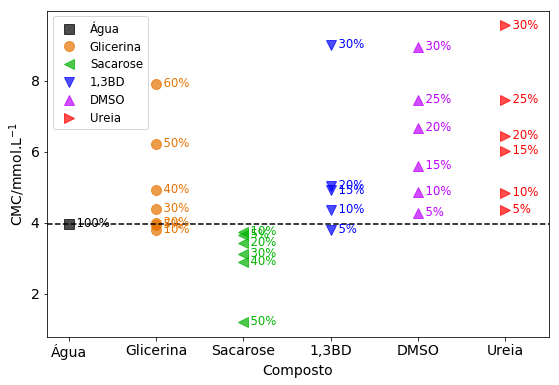

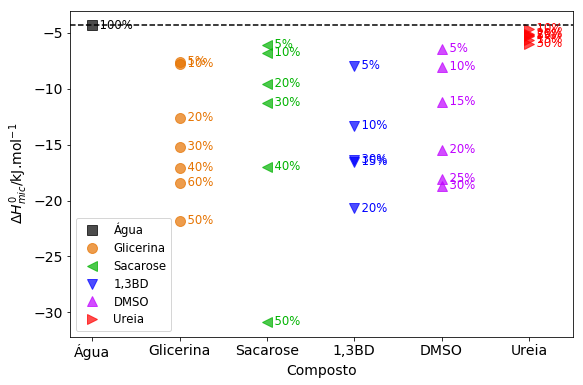

In [5]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['cmc/mM'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small')
ax1.set_xlabel('Composto')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')
ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cmc/mM']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax1.text(dados['Composto'].iloc[i], conc, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Composto')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')
ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DeltaH/kJ.mol-1']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax2.text(dados['Composto'].iloc[i], DH, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

fig1.savefig(img_path + 'CMC_por_composto.pdf')
fig2.savefig(img_path + 'DH_por_composto.pdf')

# CMC e DH em função da concentração de aditivo

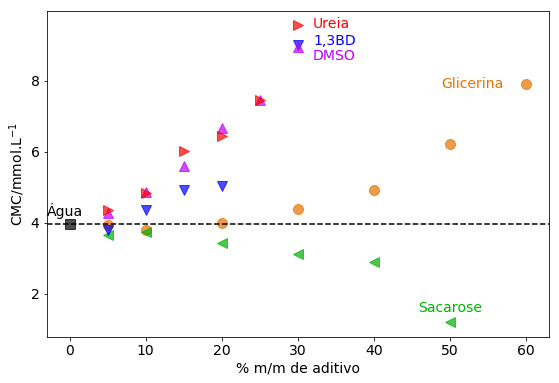

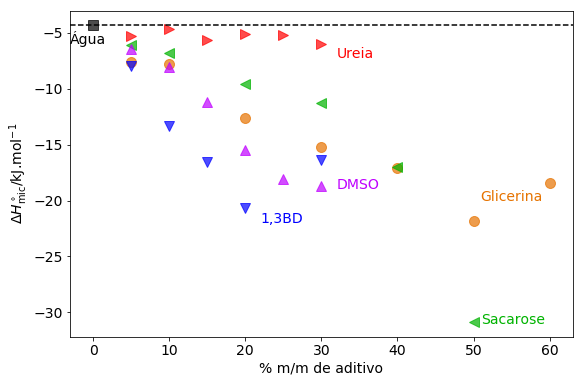

In [16]:
#mpl.rcParams.update({'font.size': 20, 'text.usetex':False})
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Concentração (% m/m)'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, color=Cores[comp], marker=Simbolos[comp],
            linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Concentração (% m/m)'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, color=Cores[comp], marker=Simbolos[comp],
            linewidth=0, markersize=def_markersize, alpha=0.7)
#     ax1.text(x = dados[dados['Composto'] == comp].iloc[-1, 1], y = dados[dados['Composto'] == comp].iloc[-1, 2] - 0.5,
#             s = comp, color=Cores[comp], ha='center')
#     ax2.text(x = dados[dados['Composto'] == comp].iloc[-1, 1], y = dados[dados['Composto'] == comp].iloc[-1, 3] - 1.5,
#             s = comp, color=Cores[comp], ha='center')

    
#ax1.legend(fontsize='small')
ax1.set_xlabel('% m/m de aditivo')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

#ax2.legend(fontsize='small')
ax2.set_xlabel('% m/m de aditivo')
ax2.set_ylabel(r'$\Delta H^\circ_\mathrm{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

ax1.text(x=53, y=7.8, s='Glicerina', color=Cores['Glicerina'], ha='center')
ax1.text(x=50, y=1.5, s='Sacarose', color=Cores['Sacarose'], ha='center')
ax1.text(x=32, y=9, s='1,3BD', color=Cores['1,3BD'])
ax1.text(x=32, y=8.6, s='DMSO', color=Cores['DMSO'])
ax1.text(x=32, y=9.5, s='Ureia', color=Cores['Ureia'])
ax1.text(x=-3, y=4.2, s='Água', color=Cores['Água'])

ax2.text(x=55, y=-20, s='Glicerina', color=Cores['Glicerina'], ha='center')
ax2.text(x=51, y=-31, s='Sacarose', color=Cores['Sacarose'])
ax2.text(x=22, y=-22, s='1,3BD', color=Cores['1,3BD'])
ax2.text(x=32, y=-19, s='DMSO', color=Cores['DMSO'])
ax2.text(x=32, y=-7.2, s='Ureia', color=Cores['Ureia'])
ax2.text(x=-3, y=-6, s='Água', color=Cores['Água'])

fig1.savefig(img_path + 'ITC_cmc_adit.pdf')
fig2.savefig(img_path + 'ITC_DH_adit.pdf')

mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

# CMC e DH em função do índice de refração

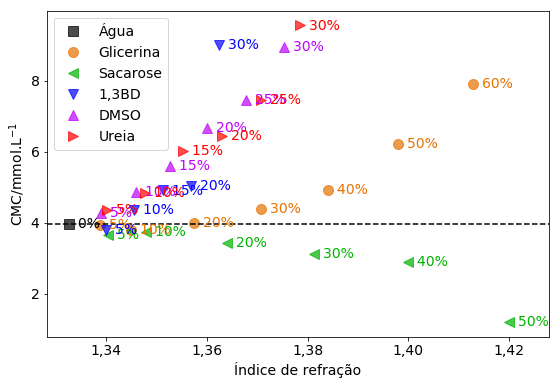

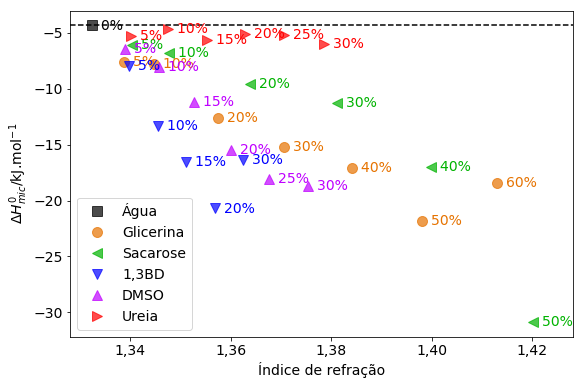

In [7]:
#mpl.rcParams.update({'font.size': 20, 'text.usetex':False})
#mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Índice de refração'], 
             dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Índice de refração'], 
             dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend()
ax1.set_xlabel('Índice de refração')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')


ax2.legend()
ax2.set_xlabel('Índice de refração')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Índice de refração'].iloc[i], conc, f"  {texto}%", 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Índice de refração'].iloc[i], conc, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], va='center', ha='left')

# right=1.42488
ax1.set_xlim(right=1.428)
ax2.set_xlim(right=1.428)

fig1.savefig(img_path + 'CMC_por_n.pdf')
fig2.savefig(img_path + 'DH_por_n.pdf')

# CMC e DH em função da cte dielétrica

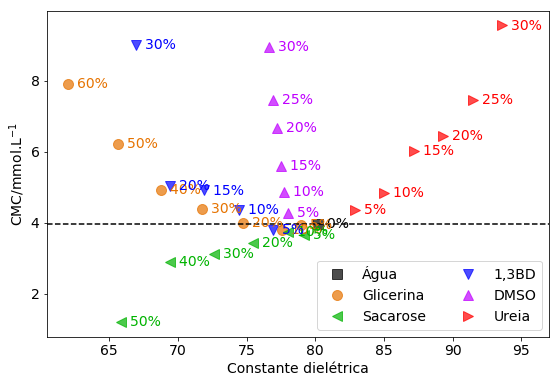

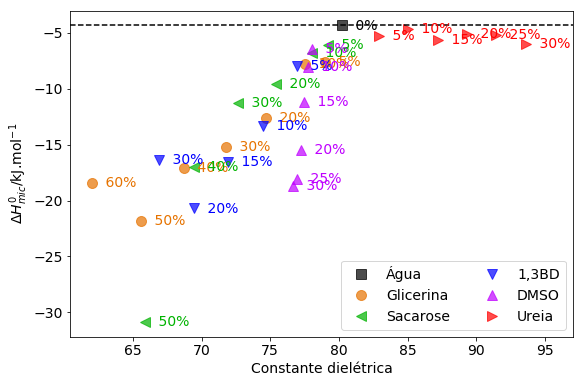

In [8]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Cte dielétrica'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Cte dielétrica'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend(ncol=2)
ax1.set_xlabel('Constante dielétrica')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

ax2.legend(ncol=2)
ax2.set_xlabel('Constante dielétrica')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Cte dielétrica'].iloc[i], conc, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Cte dielétrica'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

# right= 95.18009599999999
ax1.set_xlim(right=97)
ax2.set_xlim(right=97)
fig1.savefig(img_path + 'CMC_por_eps.pdf')
fig2.savefig(img_path + 'DH_por_eps.pdf')


# CMC e DH por G

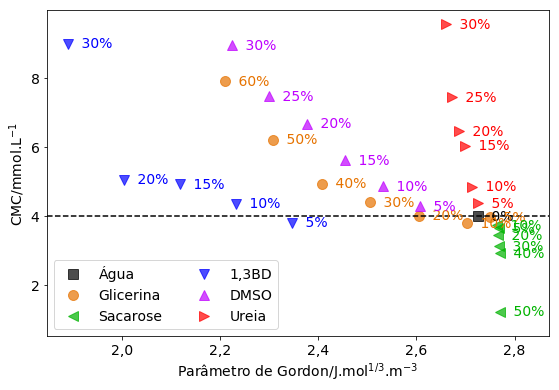

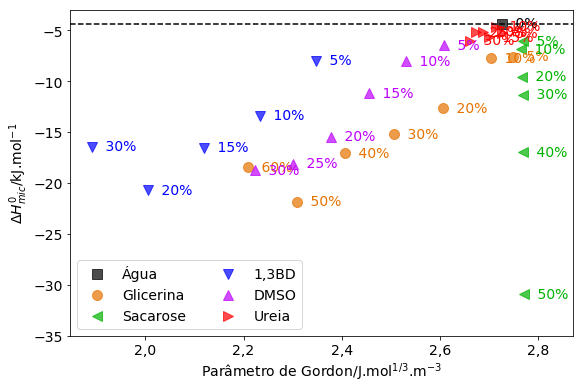

In [9]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Param Gordon'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Param Gordon'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend(ncol=2)
ax1.set_xlabel(r'Parâmetro de Gordon/J.mol$^{1/3}$.m$^{-3}$')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

ax2.legend(ncol=2)
ax2.set_xlabel(r'Parâmetro de Gordon/J.mol$^{1/3}$.m$^{-3}$')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Param Gordon'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Param Gordon'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

# right = 2.8153860649999998
ax1.set_xlim(right=2.87)
ax2.set_xlim(right=2.87)

# bottom=0.7926174999999999
ax1.set_ylim(bottom=0.5)
ax2.set_ylim(bottom=-35)
fig1.savefig(img_path + 'CMC_por_G.pdf')
fig2.savefig(img_path + 'DH_por_G.pdf')

# CMC por DH

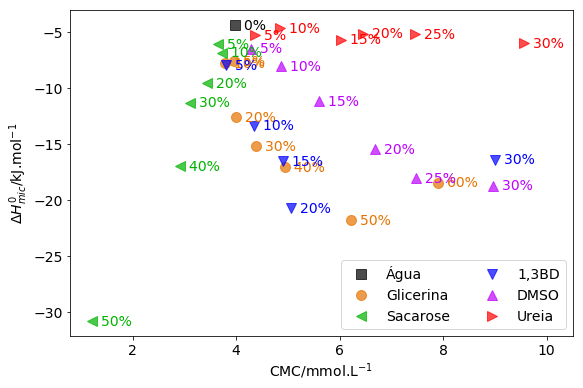

In [98]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['cmc/mM'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
                color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    ax2.text(dados['Param Gordon'].iloc[i], conc-1.5, dados['Concentração (% m/m)'].iloc[i], 
             color=Cores[dados['Composto'].iloc[i]], ha='center')
    
ax1.legend(ncol=2)
ax1.set_xlabel('CMC/mmol.L$^{-1}$')
ax1.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')

for i, DH in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['cmc/mM'].iloc[i], DH, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

#right=9.975032500000001
ax1.set_xlim(right=10.5)
fig.savefig(img_path + 'DH_por_cmc.pdf')

## Cálculos de $\Delta G$ e $\Delta S$

### Colocando densidades

In [30]:
densidades = [
    1.001,
    1.0097,
    1.0215,
    1.0459,
    1.0717,
    1.0984,
    1.1254,
    1.1530,
    1.018,
    1.038,
    1.081,
    1.127,
    1.177,
    1.230,
    0.99866,
    1.00049,
    1.00206,
    1.00525,
    1.00993,
    1.0038,
    1.0105,
    1.0174,
    1.0242,
    1.0314,
    1.0387,
    1.011,
    1.025,
    1.039,
    1.053,
    1.067,
    1.081,
]
dados['densidades'] = densidades

,Composto,Concentração (% m/m),cmc/mM,DeltaH/kJ.mol-1,Índice de refração,Viscosidade,Cte dielétrica,Param Gordon,densidades
0,Água,0,3.980465,-4.331863,1.33250,1.002000,80.200000,2.726480,1.00100
1,Glicerina,5,3.952720,-7.593361,1.33880,1.127000,78.960000,2.749596,1.00970
2,Glicerina,10,3.792220,-7.739862,1.34481,1.310000,77.550000,2.704220,1.02150
3,Glicerina,20,3.996950,-12.616962,1.35749,1.760000,74.720000,2.605320,1.04590
4,Glicerina,30,4.387000,-15.175343,1.37070,2.500000,71.770000,2.506420,1.07170
5,Glicerina,40,4.934010,-17.052040,1.38413,3.720000,68.760000,2.407520,1.09840
6,Glicerina,50,6.212160,-21.810468,1.39809,6.000000,65.630000,2.308620,1.12540
7,Glicerina,60,7.907820,-18.449047,1.41299,10.800000,62.030000,2.209720,1.15300
8,Sacarose,5,3.646240,-6.085643,1.34030,1.146000,79.210000,2.768773,1.01800
9,Sacarose,10,3.733890,-6.828784,1.34780,1.336000,78.040000,2.765195,1.03800


### Calculando pela CMC

In [31]:
R = 8.3144598 # J⋅mol−1⋅K−1
T = 25 + 273.15

# Usa a CMC em mol/L
dados['DG_1'] = R * T * np.log(dados['cmc/mM'] * 1E-3) / 1000  
dados['TDS_1'] = dados['DeltaH/kJ.mol-1'] - dados['DG_1']
dados['DS_1'] = dados['TDS_1'] / T * 1000

### Calculando pela fração molar

In [37]:
MMs = {
    'Ureia':60.0553,
    'Água':18.01528,
    'Glicerina':92.09382,
    'Sacarose':342.2965,
    'DMSO':78.13,
    '1,3BD':90.122
}

def apply_MM(string):
    return MMs[string]

dados['MM'] = dados['Composto'].apply(apply_MM)
dados['n adit'] = (
                dados['Concentração (% m/m)'] / 100  # Porcentagem
                                              * 1000 # 1000 g -> g de aditivo
                                       / dados['MM'] # n de aditivo
    
                    )
dados['n agua'] = (
            (100 - dados['Concentração (% m/m)']) / 100 # 100% - % adit / %
                                                 * 1000 # 1000g -> g de água
                                      / MMs['Água']     # n de água
)
#dados['n agua'] = (100 - dados['Concentração (% m/m)']) / 100 * 1000 / MMs['Água'] # em 1 litro (1kg, aprox)
dados['n surf'] = (
    dados['cmc/mM'] * 1E-3    # mol/L
          # d = m/v; v = m / d; m = 1000
)
#dados['n surf'] = dados['cmc/mM'] * 1E-3 # mol em 1 litro (1kg, aprox)

dados['X surf'] = dados['n surf'] / (dados['n adit'] + dados['n agua'])

# Usa a CMC em fração molar de monômero
dados['DG_2'] = R * T * np.log(dados['X surf']) / 1000
dados['TDS_2'] = dados['DeltaH/kJ.mol-1'] - dados['DG_2']
dados['DS_2'] = dados['TDS_2'] / T * 1000

dados

,Composto,Concentração (% m/m),cmc/mM,DeltaH/kJ.mol-1,Índice de refração,Viscosidade,Cte dielétrica,Param Gordon,densidades,DG_1,TDS_1,DS_1,MM,n adit,n agua,n surf,X surf,DG_2,TDS_2,DS_2
0,Água,0,3.980465,-4.331863,1.33250,1.002000,80.200000,2.726480,1.00100,-13.699596,9.367733,31.419532,18.01528,0.000000,55.508435,0.003980,0.000072,-23.656410,19.324548,64.814850
1,Glicerina,5,3.952720,-7.593361,1.33880,1.127000,78.960000,2.749596,1.00970,-13.716936,6.123574,20.538569,92.09382,0.542925,52.733013,0.003953,0.000074,-23.571988,15.978627,53.592577
2,Glicerina,10,3.792220,-7.739862,1.34481,1.310000,77.550000,2.704220,1.02150,-13.819694,6.079832,20.391856,92.09382,1.085849,49.957592,0.003792,0.000074,-23.568628,15.828766,53.089941
3,Glicerina,20,3.996950,-12.616962,1.35749,1.760000,74.720000,2.605320,1.04590,-13.689351,1.072389,3.596810,92.09382,2.171698,44.406748,0.003997,0.000086,-23.211363,10.594402,35.533797
4,Glicerina,30,4.387000,-15.175343,1.37070,2.500000,71.770000,2.506420,1.07170,-13.458525,-1.716818,-5.758237,92.09382,3.257548,38.855905,0.004387,0.000104,-22.730731,7.555388,25.340896
5,Glicerina,40,4.934010,-17.052040,1.38413,3.720000,68.760000,2.407520,1.09840,-13.167232,-3.884808,-13.029710,92.09382,4.343397,33.305061,0.004934,0.000131,-22.161609,5.109569,17.137578
6,Glicerina,50,6.212160,-21.810468,1.39809,6.000000,65.630000,2.308620,1.12540,-12.596188,-9.214280,-30.904847,92.09382,5.429246,27.754218,0.006212,0.000187,-21.277620,-0.532848,-1.787179
7,Glicerina,60,7.907820,-18.449047,1.41299,10.800000,62.030000,2.209720,1.15300,-11.997908,-6.451139,-21.637228,92.09382,6.515095,22.203374,0.007908,0.000275,-20.321103,1.872056,6.278907
8,Sacarose,5,3.646240,-6.085643,1.34030,1.146000,79.210000,2.768773,1.01800,-13.917006,7.831362,26.266518,342.29650,0.146072,52.733013,0.003646,0.000069,-23.753524,17.667880,59.258361
9,Sacarose,10,3.733890,-6.828784,1.34780,1.336000,78.040000,2.765195,1.03800,-13.858120,7.029337,23.576512,342.29650,0.292144,49.957592,0.003734,0.000074,-23.568205,16.739421,56.144295


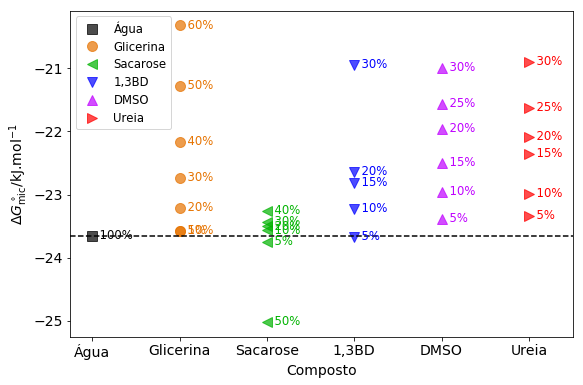

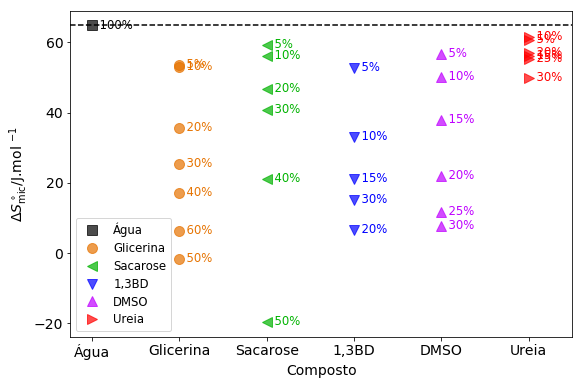

In [23]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})



fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['DG_2'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['DS_2'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small')
ax1.set_xlabel('Composto')
ax1.set_ylabel(r'$\Delta G^\circ_\mathrm{mic}$/kJ.mol$^{-1}$')
ax1.axhline(y=dados.iloc[0]['DG_2'], color='k', linestyle='--')
ax1.set_xlim(-0.252, 5.5)

for i, DG in enumerate(dados['DG_2']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax1.text(dados['Composto'].iloc[i], DG, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Composto')
ax2.set_ylabel('$\Delta S^\circ_\mathrm{mic}$/J.mol $^{-1}$')
ax2.axhline(y=dados.iloc[0]['DS_2'], color='k', linestyle='--')
ax2.set_xlim(-0.252, 5.5)

for i, DS in enumerate(dados['DS_2']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax2.text(dados['Composto'].iloc[i], DS, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

#fig1.savefig(img_path + 'CMC_por_composto.pdf')
#fig2.savefig(img_path + 'DH_por_composto.pdf')

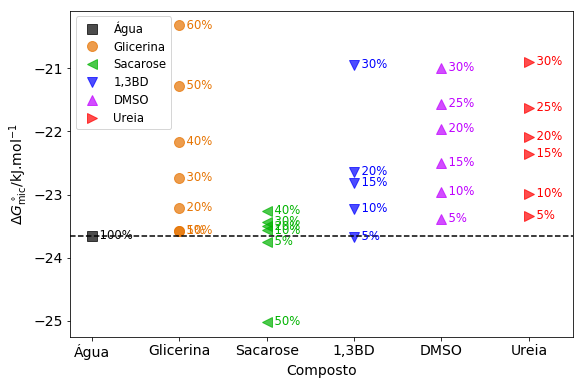

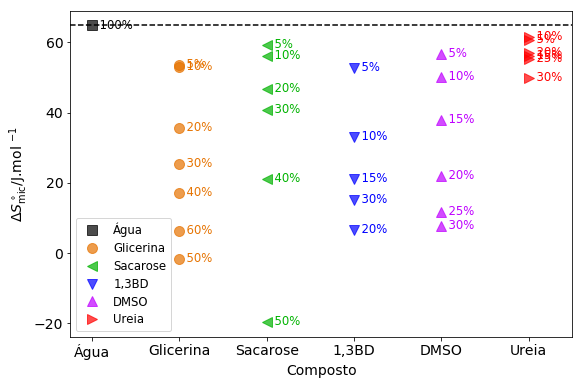

In [47]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

def plot_comparisons(ctype, xlabel):
    fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
    fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

    for comp in dados['Composto'].unique():
        ax1.plot(dados[dados['Composto'] == comp][ctype], dados[dados['Composto'] == comp]['DG_2'], label=comp,
                   c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
        ax2.plot(dados[dados['Composto'] == comp][ctype], dados[dados['Composto'] == comp]['DS_2'], label=comp,
                   c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)


    ax1.legend(fontsize='small')
    ax1.set_xlabel('Composto')
    ax1.set_ylabel(r'$\Delta G^\circ_\mathrm{mic}$/kJ.mol$^{-1}$')
    ax1.axhline(y=dados.iloc[0]['DG_2'], color='k', linestyle='--')
    #ax1.set_xlim(-0.252, 5.5)

    for i, DG in enumerate(dados['DG_2']):
        c = f"{dados['Concentração (% m/m)'].iloc[i]}"
        if c == '0':
            c = '100'
        ax1.text(dados[ctype].iloc[i], DG, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
                fontsize='small', ha='left', va='center')

    ax2.legend(fontsize='small')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('$\Delta S^\circ_\mathrm{mic}$/J.mol $^{-1}$')
    ax2.axhline(y=dados.iloc[0]['DS_2'], color='k', linestyle='--')
    #ax2.set_xlim(-0.252, 5.5)

    for i, DS in enumerate(dados['DS_2']):
        c = f"{dados['Concentração (% m/m)'].iloc[i]}"
        if c == '0':
            c = '100'
        ax2.text(dados[ctype].iloc[i], DS, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
                fontsize='small', ha='left', va='center')
        
    return fig1, fig2, ax1, ax2

fig1, fig2, ax1, ax2 = plot_comparisons('Composto', 'Composto')
ax2.set_xlim(right=5.5)
ax1.set_xlim(right=5.5)
fig1.savefig(img_path + 'DG_por_composto.pdf')
fig2.savefig(img_path + 'DS_por_composto.pdf')

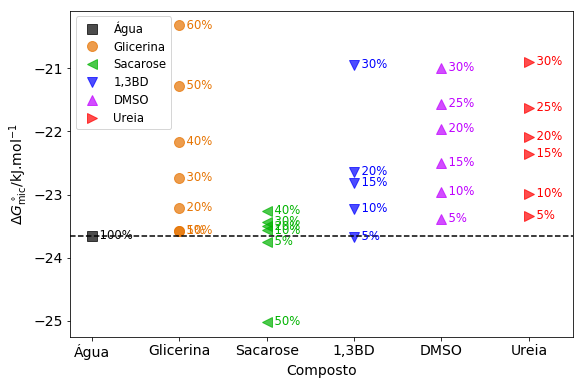

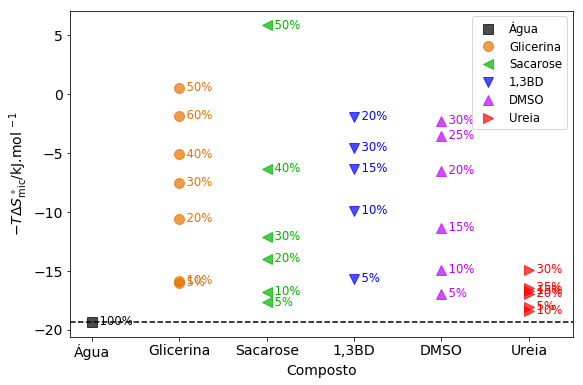

In [55]:
def plot_comparisons2(ctype, xlabel):
    fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
    fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

    for comp in dados['Composto'].unique():
        ax1.plot(dados[dados['Composto'] == comp][ctype], dados[dados['Composto'] == comp]['DG_2'], label=comp,
                   c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
        ax2.plot(dados[dados['Composto'] == comp][ctype], -1 * dados[dados['Composto'] == comp]['TDS_2'], label=comp,
                   c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)


    ax1.legend(fontsize='small')
    ax1.set_xlabel('Composto')
    ax1.set_ylabel(r'$\Delta G^\circ_\mathrm{mic}$/kJ.mol$^{-1}$')
    ax1.axhline(y=dados.iloc[0]['DG_2'], color='k', linestyle='--')
    #ax1.set_xlim(-0.252, 5.5)

    for i, DG in enumerate(dados['DG_2']):
        c = f"{dados['Concentração (% m/m)'].iloc[i]}"
        if c == '0':
            c = '100'
        ax1.text(dados[ctype].iloc[i], DG, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
                fontsize='small', ha='left', va='center')

    ax2.legend(fontsize='small')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('$-T\Delta S^\circ_\mathrm{mic}$/kJ.mol $^{-1}$')
    ax2.axhline(y=-1 * dados.iloc[0]['TDS_2'], color='k', linestyle='--')
    #ax2.set_xlim(-0.252, 5.5)

    for i, DS in enumerate(dados['TDS_2']):
        c = f"{dados['Concentração (% m/m)'].iloc[i]}"
        if c == '0':
            c = '100'
        ax2.text(dados[ctype].iloc[i], -1 * DS, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
                fontsize='small', ha='left', va='center')
        
    return fig1, fig2, ax1, ax2

fig1, fig2, ax1, ax2 = plot_comparisons2('Composto', 'Composto')
ax2.set_xlim(right=5.5)
ax1.set_xlim(right=5.5)
fig2.savefig(img_path + 'TDS_por_composto.pdf')

(<Figure size 648x432 with 1 Axes>,
 <Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c94436cf98>)

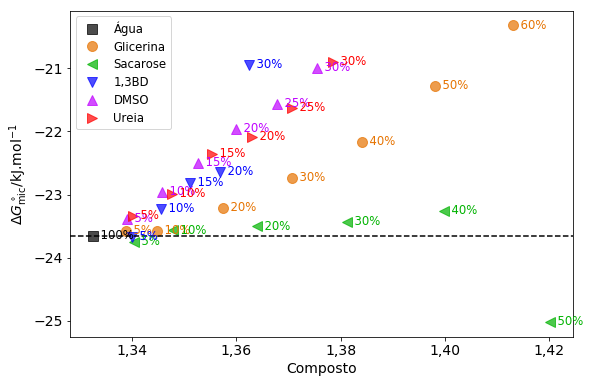

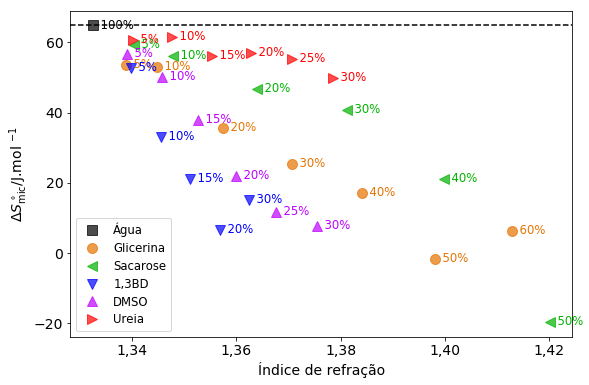

In [43]:
#Índice de refração 	Viscosidade 	Cte dielétrica 	Param Gordon
plot_comparisons('Índice de refração', 'Índice de refração')

(<Figure size 648x432 with 1 Axes>,
 <Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c944215ba8>)

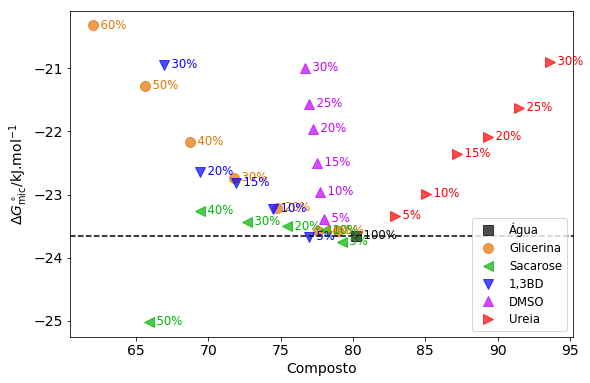

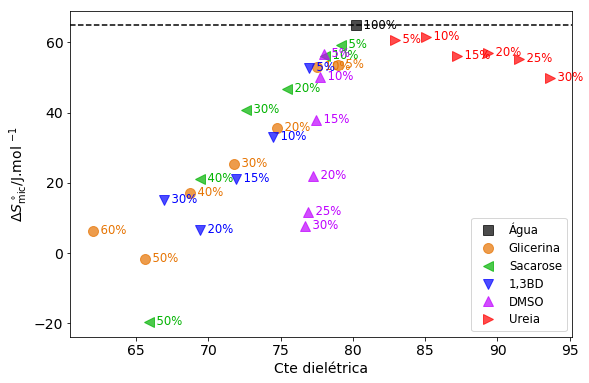

In [44]:
plot_comparisons('Cte dielétrica', 'Cte dielétrica')

(<Figure size 648x432 with 1 Axes>,
 <Figure size 648x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c943e90a20>)

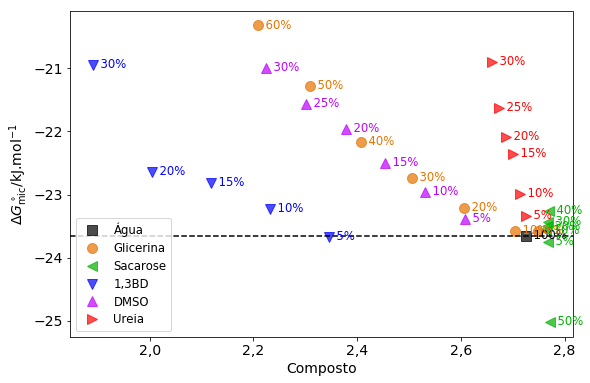

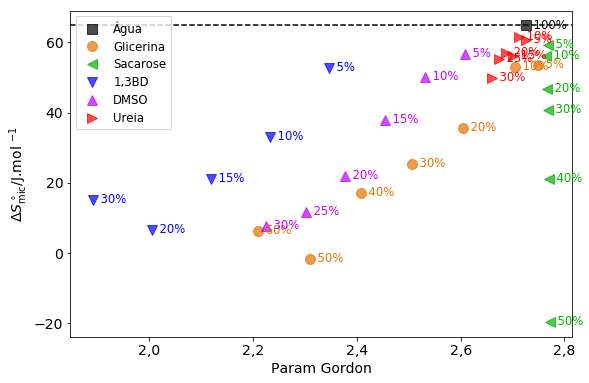

In [45]:
plot_comparisons('Param Gordon', 'Param Gordon')